# TRABAJO FINAL PROGRAMACION II
Alumno: Marco Ippolito

# ANÁLISIS DE DATOS: Goles en clubes de Lionel Andrés Messi en su carrera futbolística.

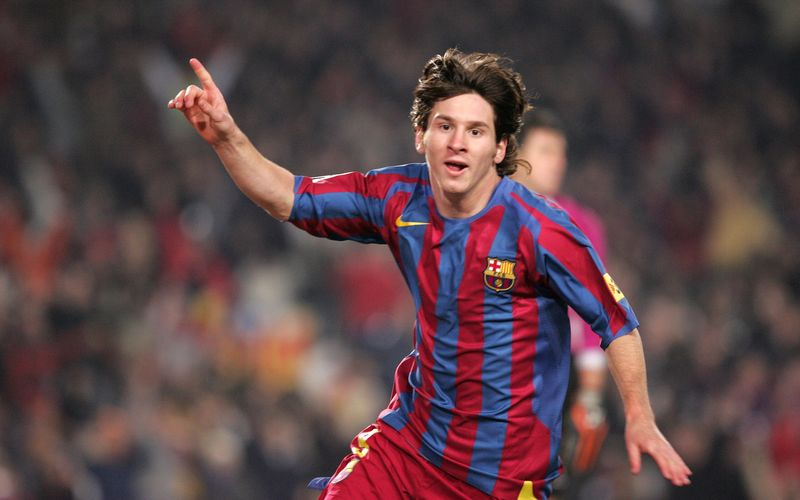

Este Trabajo fue realizado con un dataset extraido de kaggle.com actualizado al 22/07/2024

**Datos a disposición:**

*   Torneo
*   Número de encuentro en la competición
*   Fecha
*   Condición: Local/Visitante
*   Club en el que jugaba
*   Club oponente
*   Resultado del partido
*   Posición que jugó
*   Minuto del gol
*   Resultado al momento del gol
*   Tipo de gol
*   Asistidor

# Objetivo del Análisis del dataset

Al analizar este dataset me interesa explorar los siguientes tópicos con la información que se posee:


1.   Distribución de Goles por Temporada: Analizar cuantos goles hizo Messi por temporada e identificar las temporadas mas prolíficas(donde tuvo mejor rendimiento).

2.   Comparación entre Competencias: Comparar la cantidad de goles en diferentes competiciones y determinar en qué competición Messi ha sido más efectivo.

3.   Rendimiento de local vs visitante: Analizar el número de goles hechos como local y como visitante.

4.   Goles por Minuto de Partido: Descifrar en qué minutos del partido Messi marca más goles, determinar si hay patrones, como más goles en los últimos 10 minutos.

5.   Estado de los partidos antes que Messi convierta el gol: Investigar como iba el equipo de Lionel ante su adversario antes de que marque el gol.

6.   Posiciones en las que Jugó: Analizar si la posición en la que jugó afecta su capacidad goleadora y comparar los goles marcados en diferentes posiciones.

7.   Oponentes: Identificar los equipos a los que Messi le convirtió más goles, analizar si hay algún equipo contra el que tenga un desempeño especialmente destacado.

8.   Tipos de goles: Sacar los porcentajes de los distintos tipos de goles que realizó.

9.   Asistidor: Quien fué su maximo asistidor.
------------------------------------



In [5]:
# IMPORTAMOS LAS LIBRERÍAS NECESARIAS Y LEEMOS EL ARCHIVO

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("messi_goals.csv")

**Distribución de goles por temporada**

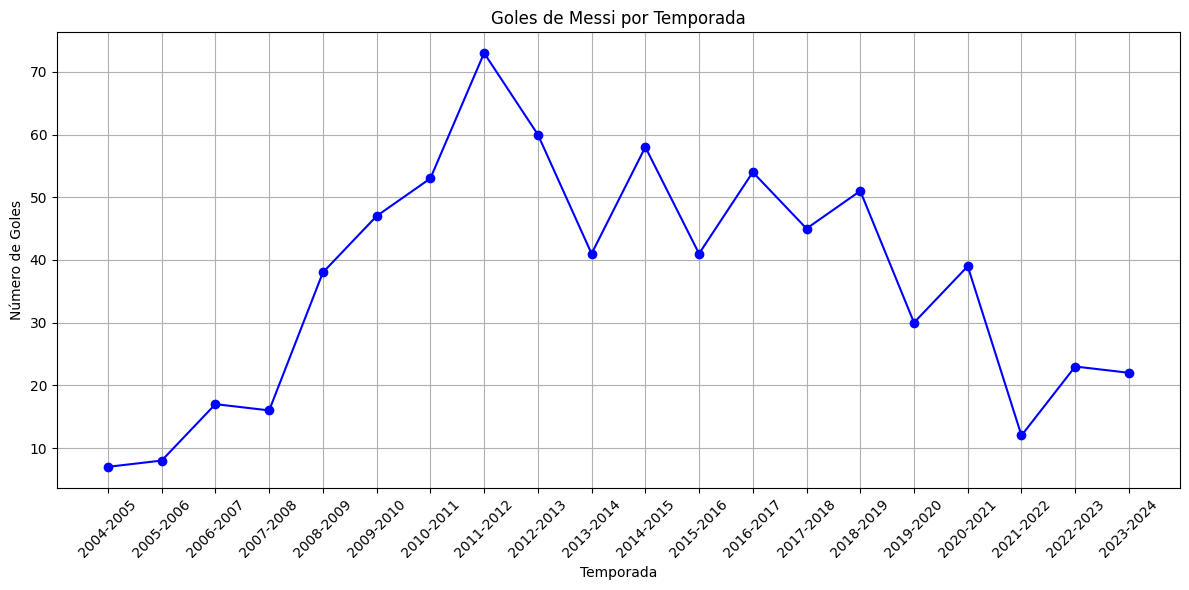

In [7]:
"""
El dataset no contiene una columna explícita llamada "Temporada", pero puedo derivar la temporada de la columna "Date". Por ejemplo,
si los partidos de una temporada suelen ocurrir entre agosto de un año y mayo del siguiente año, podemos agrupar los partidos por temporadas
utilizando esa lógica.
"""

# Convierto las fechas a formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Creo la columna de Temporada
def get_season(date):
    year = date.year
    if date.month >= 8:  # Agosto o más tarde pertenece a la temporada del próximo año
        return f'{year}-{year + 1}'
    else:  # Antes de agosto pertenece a la temporada del año anterior
        return f'{year - 1}-{year}'

df['Season'] = df['Date'].apply(get_season) #Le aplico la formula get_season a cada registro
# Contar goles por temporada
goles_por_temporada = df['Season'].value_counts().sort_index()  # Contar y ordenar

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(goles_por_temporada.index, goles_por_temporada.values, marker='o', linestyle='-', color='b')
plt.title('Goles de Messi por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Número de Goles')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad
plt.grid(True)
plt.tight_layout()  # Ajustar diseño para evitar recortes
plt.show()

In [9]:
mejores_temporadas = goles_por_temporada.nlargest(3)

# Mostrar las 3 mejores temporadas
print(mejores_temporadas)

Season
2011-2012    73
2012-2013    60
2014-2015    58
Name: count, dtype: int64


# Por lo tanto concluímos que sus mejores 3 temporadas fueron 2011-2012 donde convirtió 73 goles, 2012-2013 donde convirtió 60 goles y 2014-2015 donde convirtió 58 goles. Sus mejores temporadas fueron 3 años consecutivos.

---



---



**Comparación entre Competencias y Club con mas goles**

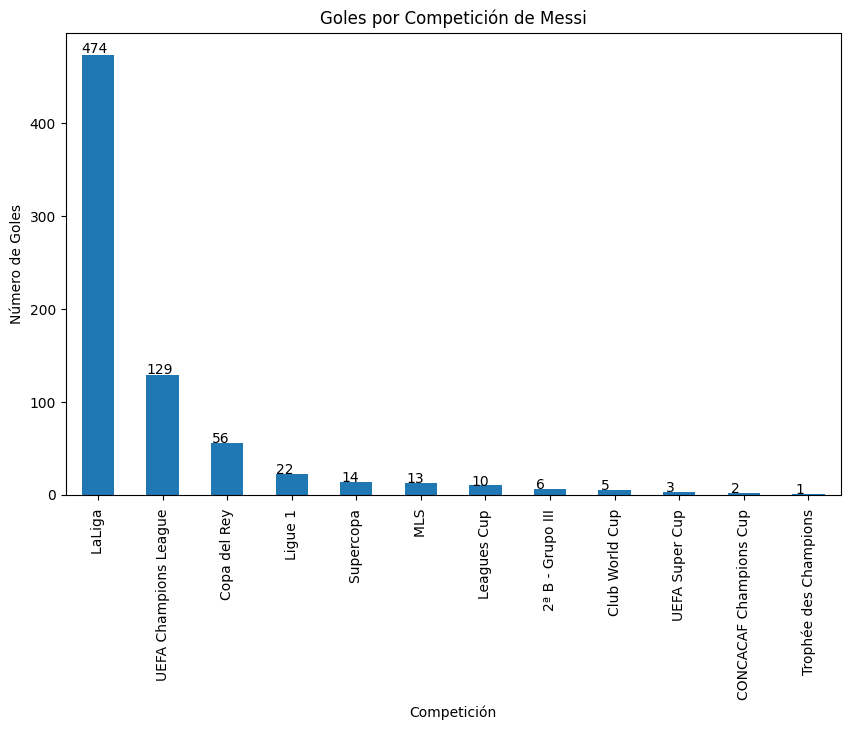

In [ ]:
# Cuento los goles por competición
goles_por_competicion = df['Tournament'].value_counts()

# Creo el grafico
graf = goles_por_competicion.plot(kind='bar', figsize=(10, 6), title='Goles por Competición de Messi', xlabel='Competición', ylabel='Número de Goles')

# Añado etiquetas con la cantidad exacta de goles a cada barra
for p in graf.patches:
    graf.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Vemos que por amplia diferencia Messi Convirtió la mayor cantidad de goles en cuanto a clubes en el torneo de La Liga - España.
Por ende podemos concluir que como el único club de España en el que jugó fue el Fútbol Club Barcelona, éste fue el club en donde hizo mas goles Lionel.

**Rendimiento de local vs visitante**

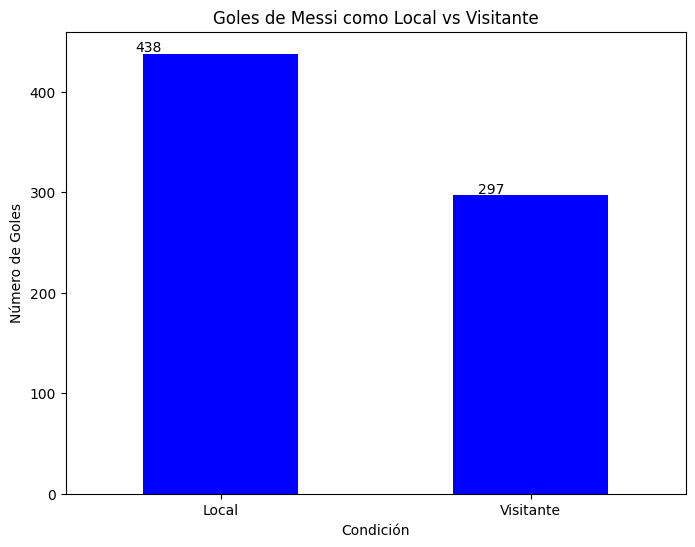

In [ ]:
goles_local = df['Venue'].value_counts().loc['Home'] #Cuento los goles como local
goles_visitante = df['Venue'].value_counts().loc['Away'] #Cuento los goles como visitante

# Creo un DataFrame para los datos
data = {'Goles': [goles_local, goles_visitante]}
index = ['Local', 'Visitante']
df_goles_v_l = pd.DataFrame(data, index=index)
graf = df_goles_v_l.plot(kind='bar', figsize=(8, 6), legend=False, title='Goles de Messi como Local vs Visitante', xlabel='Condición', ylabel='Número de Goles', color=['blue', 'orange'])

# Añado etiquetas con la cantidad exacta de goles a cada barra
for p in graf.patches:
    graf.annotate(str(p.get_height()), (p.get_x() * 1.105, p.get_height() * 1.005))

plt.xticks(rotation=0)
plt.show()

Podemos notar estadísticamente que Messi hizo 141 goles mas de local que de visitante. Por lo que concluímos que le va mejor, en cuanto a hacer goles, jugando de local.

**Goles por Minuto de Partido**

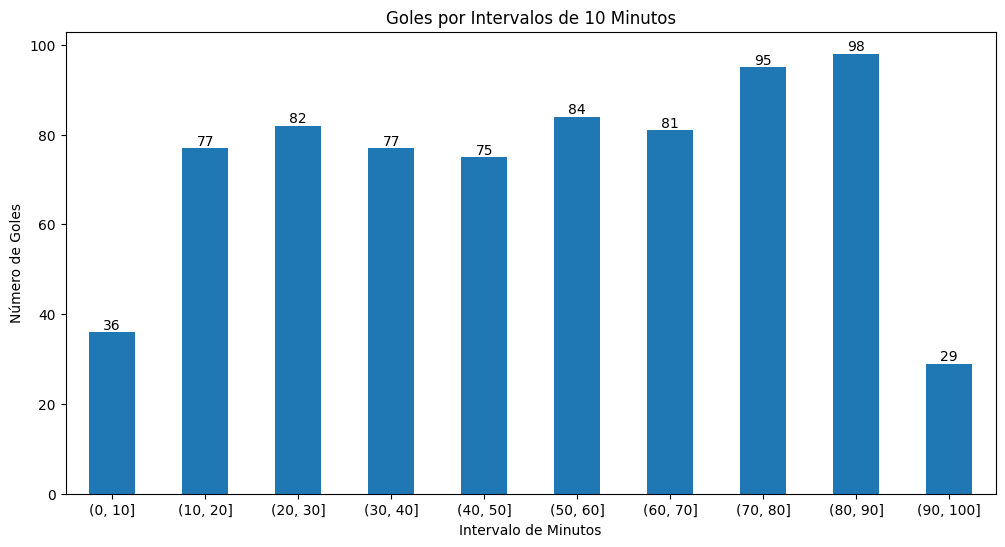

In [ ]:
# Defino la función para limpiar y convertir los minutos a enteros
def convertir_minutos(minuto):
    if "'" in minuto:
        minuto = minuto.replace("'", "")
    if "+" in minuto:
        partes = minuto.split("+")
        return int(partes[0]) + int(partes[1])
    else:
        return int(minuto)

# Crear una nueva columna en un nuevo DataFrame
df_minutos_enteros = df.copy()
df_minutos_enteros['Minute'] = df['Minute'].apply(convertir_minutos)

# Contar los goles por minuto
goles_por_minuto = df_minutos_enteros['Minute'].value_counts().sort_index()

# Definir intervalos de 10 minutos
intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Contar los goles en los intervalos definidos
goles_por_intervalo = pd.cut(df_minutos_enteros['Minute'], bins=intervalos).value_counts().sort_index()

# Mostrar los goles por intervalo
#print(goles_por_intervalo)
graf = goles_por_intervalo.plot(kind='bar', figsize=(12, 6), title='Goles por Intervalos de 10 Minutos', xlabel='Intervalo de Minutos', ylabel='Número de Goles')

# Añadir etiquetas con la cantidad exacta de goles a cada barra
for p in graf.patches:
    graf.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xticks(rotation=0) #Etiquetas orientadas horizontalmente
plt.show()

Podemos concluir con esto que Lionel Messi es mas determinante a la hora de hacer goles entre los 70 y 90 minutos de partido.

**Resultado del partido al momento de los goles de Messi**

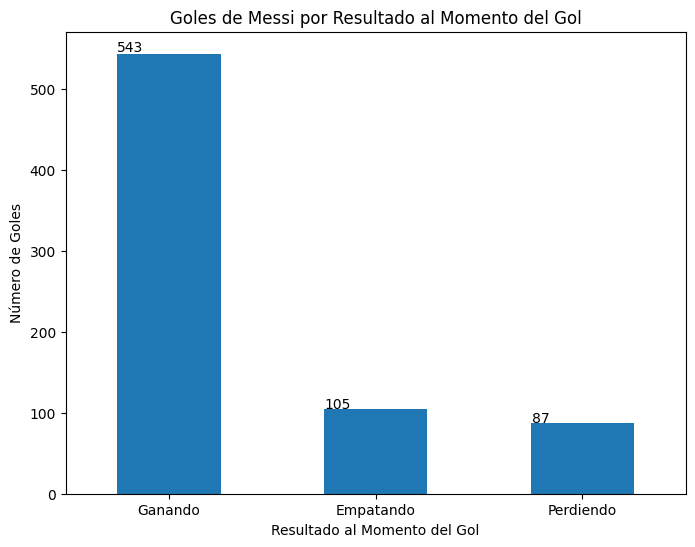

Resultado al Momento del Gol
Ganando      543
Empatando    105
Perdiendo     87
Name: count, dtype: int64


In [ ]:
# Crear una nueva columna 'Resultado al Momento del Gol'
def resultado_al_momento(row):
    goles_home = int(row['Result'].split(':')[0])
    goles_away = int(row['Result'].split(':')[1])

    if row['Venue'] == 'Home':
        if goles_home-1 > goles_away:
            return 'Ganando'
        elif goles_home-1 < goles_away:
            return 'Perdiendo'
        else:
            return 'Empatando'
    elif row['Venue'] == 'Away':
        if goles_away-1 > goles_home:
            return 'Ganando'
        elif goles_away-1 < goles_home:
            return 'Perdiendo'
        else:
            return 'Empatando'
    else:
        return 'Empatando'

# Aplicar la función al DataFrame
df2 = df.copy()
df2['Resultado al Momento del Gol'] = df2.apply(resultado_al_momento, axis=1)

# Contar los goles por resultado al momento del gol
goles_por_resultado = df2['Resultado al Momento del Gol'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
graf = goles_por_resultado.plot(kind='bar', title='Goles de Messi por Resultado al Momento del Gol', xlabel='Resultado al Momento del Gol', ylabel='Número de Goles')

# Añadir etiquetas con la cantidad exacta de goles a cada barra
for p in graf.patches:
    graf.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xticks(rotation=0)
plt.show()

# Imprimir la tabla de resultado al momento del gol
print(goles_por_resultado)

Gracias a esta información podemos deducir que Messi hizo 438 goles más cuando su equipo iba ganando que empatando, a su vez hizo 456 goles mas cuando su equipo iba ganando que perdiendo e hizo 18 goles mas cuando su equipo iba empatando que perdiendo.
Esto tiene lógica ya que para llegar a la cantidad de goles que tiene en clubes (729), tuvo que haber hecho muchos hattricks o mas goles en bastantes partidos diferentes.

**Posiciones en las que Jugó**

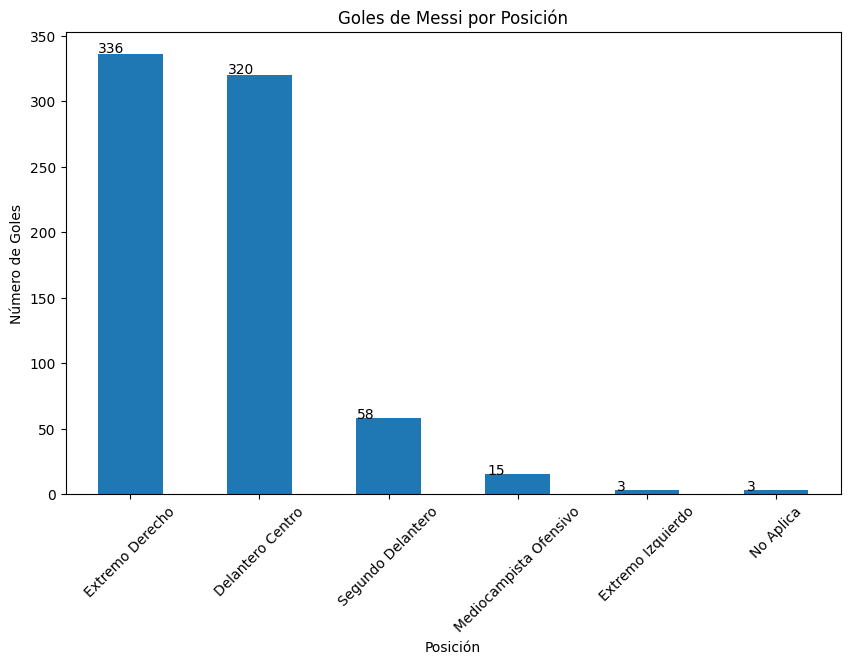

In [ ]:
# Cambio los valores de los registros a posiciones en español para que se entienda
posiciones_map = {
    'RW': 'Extremo Derecho',
    'CF': 'Delantero Centro',
    'SS': 'Segundo Delantero',
    'AM': 'Mediocampista Ofensivo',
    'LW': 'Extremo Izquierdo',
    'Not Applicable': 'No Aplica'
}

# Reemplazar los códigos de las posiciones en el DataFrame
df['Position'] = df['Position'].replace(posiciones_map)

# Contar los goles por posición
goles_por_posicion = df['Position'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
graf = goles_por_posicion.plot(kind='bar', title='Goles de Messi por Posición', xlabel='Posición', ylabel='Número de Goles')

# Añadir etiquetas con la cantidad exacta de goles a cada barra
for p in graf.patches:
    graf.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xticks(rotation=45)
plt.show()

**Goles a Oponentes**

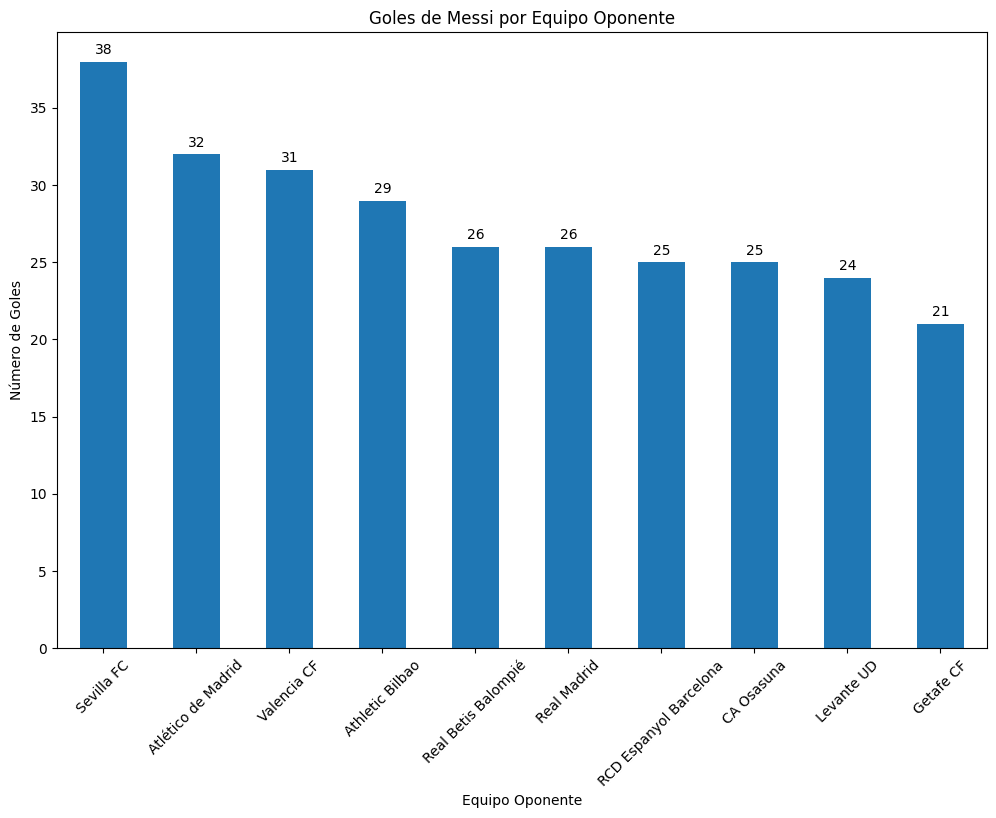

In [ ]:
# Contar los goles por equipo oponente
goles_por_oponente = df['Opponent'].value_counts()

# Crear un gráfico de barras para los 10 equipos con más goles
plt.figure(figsize=(12, 8))
graf = goles_por_oponente.head(10).plot(kind='bar', title='Goles de Messi por Equipo Oponente', xlabel='Equipo Oponente', ylabel='Número de Goles')

# Añadir etiquetas con la cantidad exacta de goles a cada barra
for p in graf.patches:
    graf.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 0.5), ha='center')

plt.xticks(rotation=45)
plt.show()

**Tipos de goles**

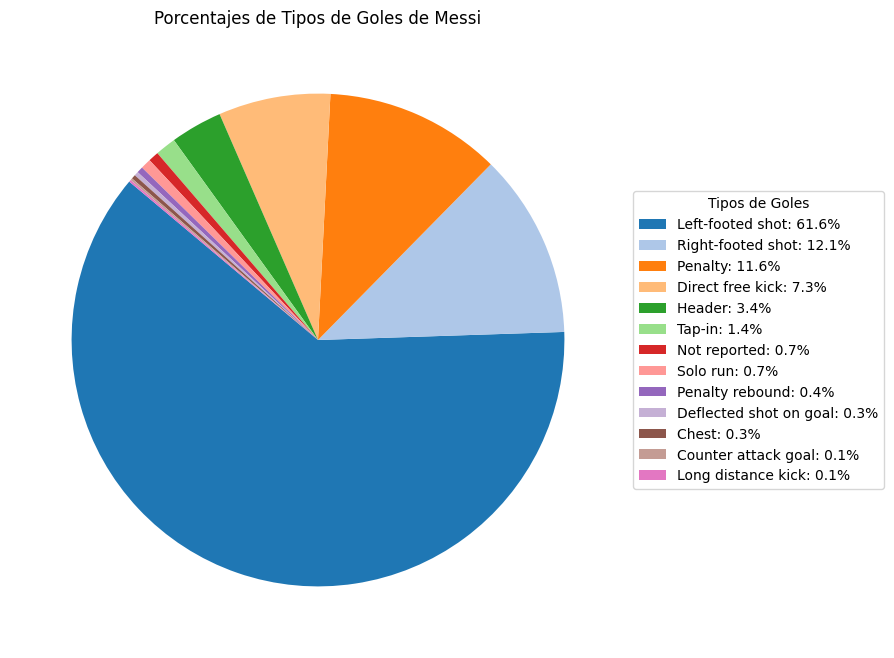

In [ ]:
# Contar los goles por tipo
goles_por_tipo = df['Goal Type'].value_counts()

# Calcular los porcentajes de goles por tipo
porcentajes_por_tipo = (goles_por_tipo / goles_por_tipo.sum()) * 100

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(porcentajes_por_tipo, startangle=140, colors=plt.cm.tab20.colors)

# Crear una leyenda con los porcentajes de cada tipo de gol
legend_labels = [f'{tipo}: {porcentaje:.1f}%' for tipo, porcentaje in zip(porcentajes_por_tipo.index, porcentajes_por_tipo)]
plt.legend(wedges, legend_labels, title='Tipos de Goles', loc='center left', bbox_to_anchor=(1, 0.5))

# Título del gráfico
plt.title('Porcentajes de Tipos de Goles de Messi')

# Mostrar el gráfico
plt.show()

**Mejor Asistidor de Lionel**

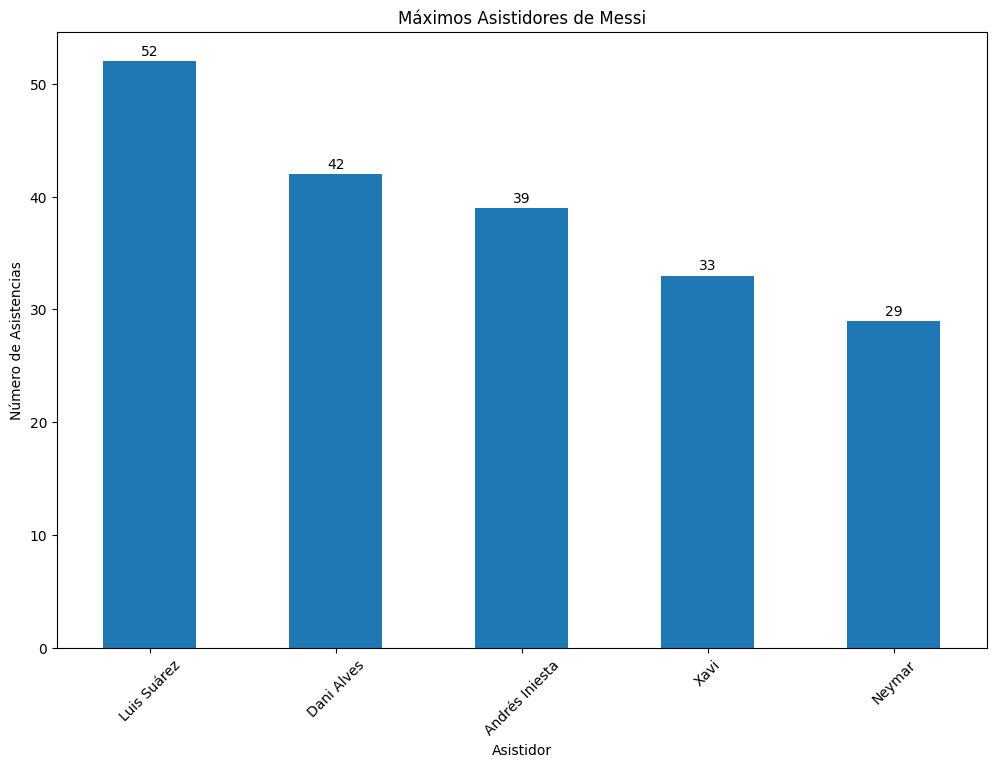

In [17]:
# Contar los asistidores
goles_por_asistidor = df['Assist'].value_counts()
goles_por_asistidor = goles_por_asistidor[goles_por_asistidor.index != 'Not Applicable']  # Filtro los registros con "Not Applicable"

# Crear un gráfico de barras para sus 5 maximos asistidores.
plt.figure(figsize=(12, 8))
graf = goles_por_asistidor.head(5).plot(kind='bar', title='Máximos Asistidores de Messi', xlabel='Asistidor', ylabel='Número de Asistencias')

# Añadir etiquetas con la cantidad exacta de goles a cada barra
for p in graf.patches:
    graf.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 0.5), ha='center')

plt.xticks(rotation=45)
plt.show()

Sus maximos asistidores fueron todos compañeros del Futbol Club Barcelona, Luis Zuáres en primer lugar, siguiendole en orden Dani Alves, Andrés Iniesta, Xavi y por ultimo Neymar.
Cabe aclarar que en los registros la mayoría de goles que hizo fueron sin asistencia, los cuales aparecen en el dataset como "Not Aplicable".

***Lionel Andres Messi es el segundo maximo goleador en toda la historia del futbol. Tiene 729 goles en clubes y 109 con la seleccion Argentina, dando un total de 838 goles en su carrera. El unico jugador que lo supera(en goles) es Cristiano Ronaldo con 765 goles en clubes y 130 con la seleccion de Portugal dando un total de 895 goles.***

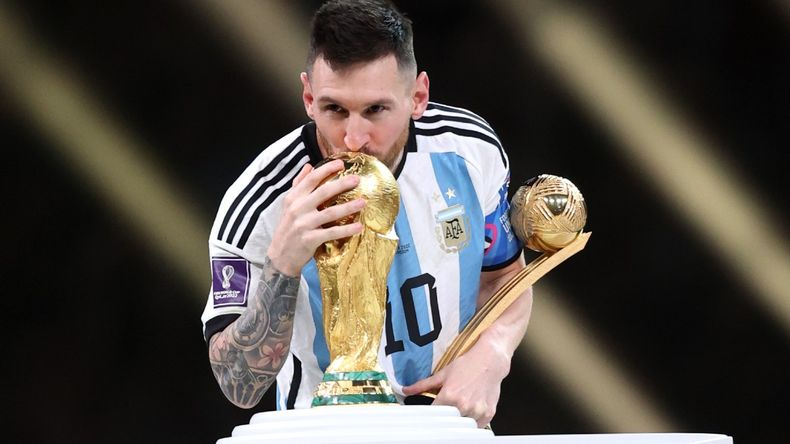

# Fin